# **Carga de datos y librerias**

In [1]:
import pandas as pd
import re
import string  
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import cess_esp
nltk.download('cess_esp')
import pandas as pd
import matplotlib.pyplot as plt
import re
import string  
import nltk
import scipy
import math
import numpy as np
import seaborn as sns
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import cess_esp
nltk.download('cess_esp')
from nltk.corpus import wordnet
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve,auc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,ConfusionMatrixDisplay

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package cess_esp to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!
[nltk

In [2]:
# Creating a pandas dataframe from reviews.txt file
df_tracks=pd.read_csv('MovieReviews.csv', sep=',', encoding = 'utf-8')
df_tracks.head()

,Unnamed: 0,review_es,sentimiento
0,0,Si está buscando una película de guerra típica...,positivo
1,1,Supongo que algunos directores de películas de...,positivo
2,2,Es difícil contarle más sobre esta película si...,positivo
3,3,"La película comienza muy lentamente, con el es...",positivo
4,4,Esta película es verdadera acción en su máxima...,positivo


In [3]:
df_tracks.info

<bound method DataFrame.info of       Unnamed: 0                                          review_es  \
0              0  Si está buscando una película de guerra típica...   
1              1  Supongo que algunos directores de películas de...   
2              2  Es difícil contarle más sobre esta película si...   
3              3  La película comienza muy lentamente, con el es...   
4              4  Esta película es verdadera acción en su máxima...   
...          ...                                                ...   
4995        4995  "Criminal decente ordinario" es triste porque ...   
4996        4996  Savage Island (2003) es una película coja.Es m...   
4997        4997  Quien escribió el script para esta película no...   
4998        4998  in a TV-movie 70's kind of way It's one of tho...   
4999        4999  Película decepcionante, predecible en la que u...   

     sentimiento  
0       positivo  
1       positivo  
2       positivo  
3       positivo  
4       positivo  
.

In [4]:
def label_to_number(label):
    if label == "positivo":
        return 1
    else:
        return 0
df_tracks['label'] = df_tracks['sentimiento'].apply(label_to_number)
df_tracks.head()

,Unnamed: 0,review_es,sentimiento,label
0,0,Si está buscando una película de guerra típica...,positivo,1
1,1,Supongo que algunos directores de películas de...,positivo,1
2,2,Es difícil contarle más sobre esta película si...,positivo,1
3,3,"La película comienza muy lentamente, con el es...",positivo,1
4,4,Esta película es verdadera acción en su máxima...,positivo,1


# **Limpieza de las reseñas**

In [5]:
def clean_text(text):
    """
    Limpia el texto eliminando signos de puntuación, números y palabras vacías.
    """
    text = text.lower() # Convertir todo el texto a minúsculas
    text = re.sub('\[.*?\]', '', text) # Eliminar cualquier cosa entre corchetes
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Eliminar signos de puntuación
    text = re.sub('\w*\d\w*', '', text) # Eliminar cualquier número
    text = re.sub('[‘’“”…]', '', text) # Eliminar comillas
    text = re.sub('\n', '', text) # Eliminar saltos de línea
    return text
df_tracks['Clean Review'] = df_tracks['review_es'].apply(clean_text)
df_tracks['BoWReviews'] = df_tracks['review_es'].apply(clean_text)
df_tracks.head()

,Unnamed: 0,review_es,sentimiento,label,Clean Review,BoWReviews
0,0,Si está buscando una película de guerra típica...,positivo,1,si está buscando una película de guerra típica...,si está buscando una película de guerra típica...
1,1,Supongo que algunos directores de películas de...,positivo,1,supongo que algunos directores de películas de...,supongo que algunos directores de películas de...
2,2,Es difícil contarle más sobre esta película si...,positivo,1,es difícil contarle más sobre esta película si...,es difícil contarle más sobre esta película si...
3,3,"La película comienza muy lentamente, con el es...",positivo,1,la película comienza muy lentamente con el est...,la película comienza muy lentamente con el est...
4,4,Esta película es verdadera acción en su máxima...,positivo,1,esta película es verdadera acción en su máxima...,esta película es verdadera acción en su máxima...


In [6]:
def remove_stopwords(text):
    """
    Elimina las palabras vacías del texto.
    """
    stop_words = set(stopwords.words('spanish'))
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
df_tracks['Clean Review'] = df_tracks['Clean Review'].apply(remove_stopwords)
df_tracks['BoWReviews'] = df_tracks['BoWReviews'].apply(remove_stopwords)
df_tracks.head()

,Unnamed: 0,review_es,sentimiento,label,Clean Review,BoWReviews
0,0,Si está buscando una película de guerra típica...,positivo,1,si buscando película guerra típica así nota af...,si buscando película guerra típica así nota af...
1,1,Supongo que algunos directores de películas de...,positivo,1,supongo directores películas lujo sentados bus...,supongo directores películas lujo sentados bus...
2,2,Es difícil contarle más sobre esta película si...,positivo,1,difícil contarle película estropearlalo disfru...,difícil contarle película estropearlalo disfru...
3,3,"La película comienza muy lentamente, con el es...",positivo,1,película comienza lentamente estilo vida walla...,película comienza lentamente estilo vida walla...
4,4,Esta película es verdadera acción en su máxima...,positivo,1,película verdadera acción máxima expresión mej...,película verdadera acción máxima expresión mej...


In [7]:
def tokenize_text(text):
    """
    Tokeniza el texto.
    """
    tokens = nltk.word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    return tokens

df_tracks['Clean Review'] = df_tracks['Clean Review'].apply(tokenize_text)
df_tracks.head()

,Unnamed: 0,review_es,sentimiento,label,Clean Review,BoWReviews
0,0,Si está buscando una película de guerra típica...,positivo,1,"[si, buscando, película, guerra, típica, así, ...",si buscando película guerra típica así nota af...
1,1,Supongo que algunos directores de películas de...,positivo,1,"[supongo, directores, películas, lujo, sentado...",supongo directores películas lujo sentados bus...
2,2,Es difícil contarle más sobre esta película si...,positivo,1,"[difícil, contarle, película, estropearlalo, d...",difícil contarle película estropearlalo disfru...
3,3,"La película comienza muy lentamente, con el es...",positivo,1,"[película, comienza, lentamente, estilo, vida,...",película comienza lentamente estilo vida walla...
4,4,Esta película es verdadera acción en su máxima...,positivo,1,"[película, verdadera, acción, máxima, expresió...",película verdadera acción máxima expresión mej...


In [8]:
def lematizar_lista_textos(textos):
    """
    Esta función toma una lista de textos en español como entrada y devuelve una lista de listas de palabras lematizadas
    """
    stemmer = SnowballStemmer('spanish')
    lemas = []
    for texto in textos:
        lemas_texto = stemmer.stem(texto) 
        lemas.append(lemas_texto)
    return lemas

df_tracks['Clean Review'] = df_tracks['Clean Review'].apply(lematizar_lista_textos)
df_tracks.head()

,Unnamed: 0,review_es,sentimiento,label,Clean Review,BoWReviews
0,0,Si está buscando una película de guerra típica...,positivo,1,"[si, busc, pelicul, guerr, tipic, asi, not, af...",si buscando película guerra típica así nota af...
1,1,Supongo que algunos directores de películas de...,positivo,1,"[supong, director, pelicul, luj, sent, busc, a...",supongo directores películas lujo sentados bus...
2,2,Es difícil contarle más sobre esta película si...,positivo,1,"[dificil, cont, pelicul, estropearlal, disfrut...",difícil contarle película estropearlalo disfru...
3,3,"La película comienza muy lentamente, con el es...",positivo,1,"[pelicul, comienz, lent, estil, vid, wallac, n...",película comienza lentamente estilo vida walla...
4,4,Esta película es verdadera acción en su máxima...,positivo,1,"[pelicul, verdader, accion, maxim, expresion, ...",película verdadera acción máxima expresión mej...


In [9]:
vectorizer=TfidfVectorizer()

X = [' '.join(doc)  for doc in df_tracks['Clean Review']]
#X_prueba= [' '.join(doc)  for doc in df_tracks_test['Clean Review']]

X = vectorizer.fit_transform(X)
#X_prueba=vectorizer.fit_transform(X_prueba)

y = df_tracks['label']

# **Análisis de datos**
Con el numero de reseñas y el sentimiento de cada una, se puede determinar el numero de cada una del total de reseñas

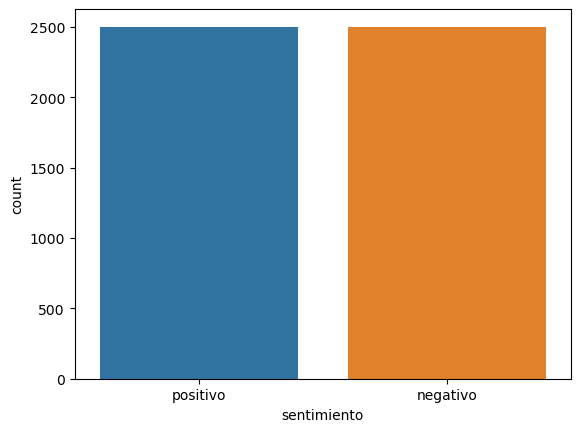

In [10]:
count = sns.countplot(data=df_tracks, x='sentimiento', order=df_tracks['sentimiento'].value_counts().index)
plt.show()

De esta tabla, se uede ver que las reseñas de pelicula estan divididas en un 50% entre positivas y negativas. Pero si queremos tener un mayor detalle sobre como son las reseñas en general, con las palabras de las reseñas limpias y tokenizadas, se puede hacer uso de la libreria de workcloud para ver una representacion de las palabras mas comunes escritas a travez de todas las reseñas para saber como se describen usualmente las peliculas y tener en mas detalle la recepcion de esta  en general

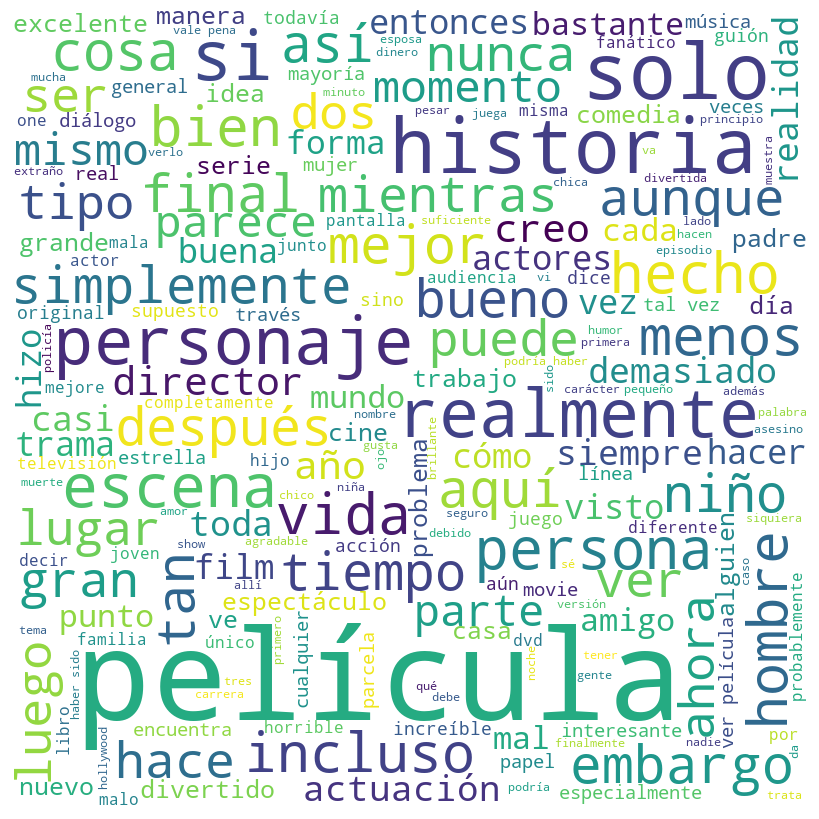

In [11]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(" ".join(df_tracks["BoWReviews"].tolist()))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Entre varias palabras que parecen neutrales, tales como "película", "historia", "personaje", hay algunas palabras que se podrian considerar como calificativos positivos, como "mejor", "gran", "buena", "interesante", "bien", "increible", entre otras, y se ven en mayor medida y tamaño que palabras con connotacion negativa como "mal", "sin embargo", "malo" u "horrible". 

Esta discrepancia entre una mayoria de calificativos positivos en las reseñas y un 50% de recepcion positiva y negativa se puede explicar con que las reseñas ositivas suelen ser mas descriptivas que las reseñas negativas.

# **Algoritmo KNN utilizando Bag of Words**

In [48]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_tracks["BoWReviews"], df_tracks["sentimiento"], test_size=0.2, random_state=42)

# Preprocesamiento de datos y vectorización
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Entrenar el modelo
k = 2 # número de vecinos más cercanos
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Evaluación del modelo
y_pred = knn.predict(X_test)

print("Accuracy of KNN with Bag of Words:", accuracy_score(y_test, y_pred))
print("Precision of KNN with Bag of Words:", precision_score(y_test, y_pred, pos_label='positivo'))
print("Recall of KNN with Bag of Words:", recall_score(y_test, y_pred, pos_label='positivo'))
print("F1 score of KNN with Bag of Words:", f1_score(y_test, y_pred, pos_label='positivo'))

Accuracy of KNN with Bag of Words: 0.525
Precision of KNN with Bag of Words: 0.5706214689265536
Recall of KNN with Bag of Words: 0.202
F1 score of KNN with Bag of Words: 0.2983751846381093


C:\Users\danie\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [42]:
y_train_knn_predict = knn.predict(X_train)
y_test_knn_predict = knn.predict(X_test)

C:\Users\danie\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


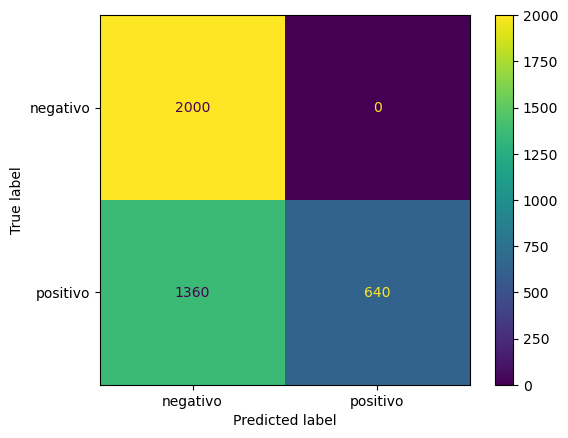

In [43]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_knn_predict)

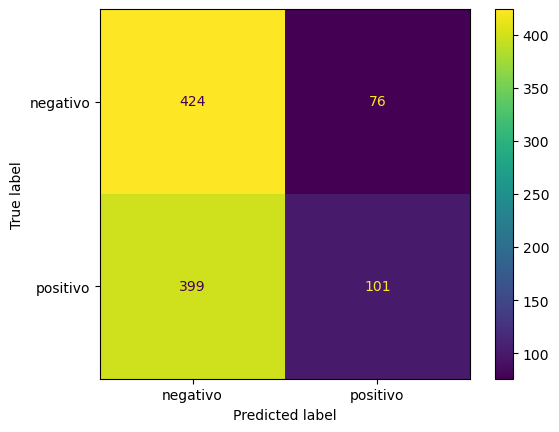

In [45]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_knn_predict)

______________________________________________________________________________________________________________________________________________________

# Preparacion de datos

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

______________________________________________________________________________________________________________________________________________________

# Aplicacion del metodo SVM Linear

In [16]:
svm = LinearSVC()
svc_classifier=svm.fit(X_train, y_train)

In [17]:
y_train_svm_predict = svm.predict(X_train)
y_test_svm_predict = svm.predict(X_test)

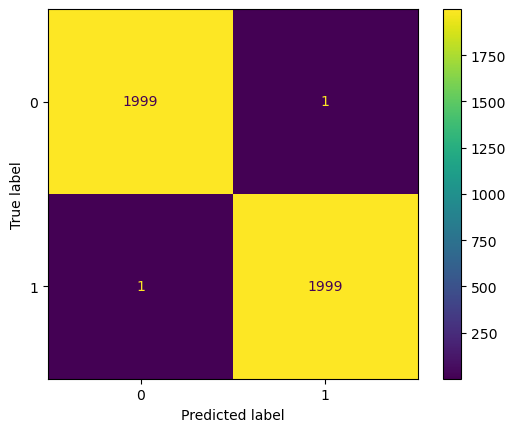

In [18]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_svm_predict)

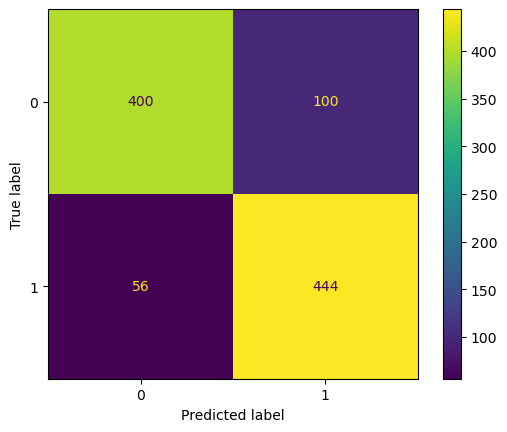

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_svm_predict)

In [20]:
svc_y_pred=svc_classifier.predict(X_test)
svc_cm=confusion_matrix(y_test,svc_y_pred)
svc_accuracy = accuracy_score(y_test, svc_y_pred)
svc_precision = precision_score(y_test, svc_y_pred)
svc_recall = recall_score(y_test, svc_y_pred)
svc_f1_score = f1_score(y_test, svc_y_pred)

In [21]:
print("Accuracy of Support-Vector-Machine is {}%".format(math.floor(svc_accuracy*100)))
print("Precision of Support-Vector-Machine is {}%".format(math.floor(svc_precision*100)))
print("Recall of Support-Vector-Machine is {}%".format(math.floor(svc_recall*100)))
print("F1_score of Support-Vector-Machine is {}%".format(math.floor(svc_f1_score*100)))

Accuracy of Support-Vector-Machine is 84%
Precision of Support-Vector-Machine is 81%
Recall of Support-Vector-Machine is 88%
F1_score of Support-Vector-Machine is 85%


______________________________________________________________________________________________________________________________________________________

# Random Forest

In [22]:
tfidf_model = RandomForestClassifier(random_state = 3)

In [23]:
tfidf_classifier=tfidf_model.fit(X_train, y_train)

In [24]:
tfidf_estimators = tfidf_model.estimators_
print('Number of trees:', len(tfidf_estimators))
print('Trees depth (mean):', np.mean([tree.get_depth() for tree in tfidf_estimators]))

Number of trees: 100
Trees depth (mean): 151.99


In [25]:
y_train_tfidf_predict = tfidf_model.predict(X_train)
y_test_tfidf_predict = tfidf_model.predict(X_test)

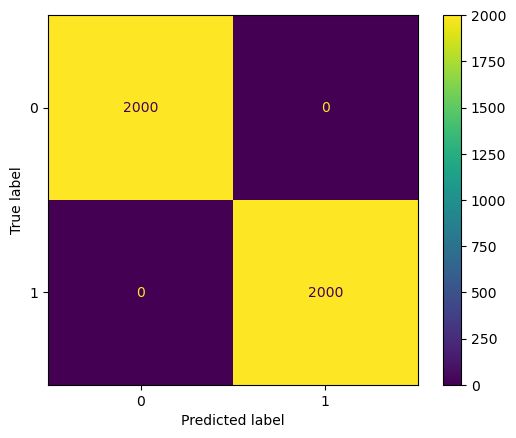

In [26]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

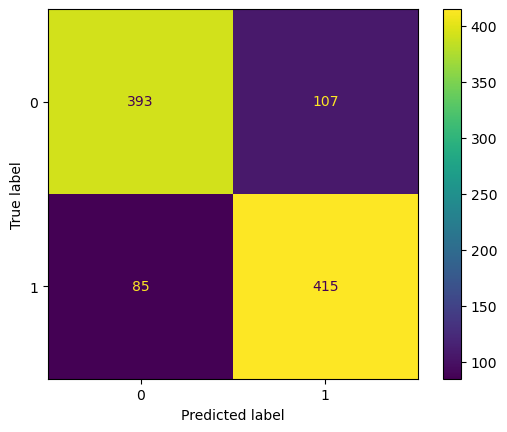

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [28]:
svc_y_pred=tfidf_classifier.predict(X_test)
svc_cm=confusion_matrix(y_test,svc_y_pred)
svc_accuracy = accuracy_score(y_test, svc_y_pred)
svc_precision = precision_score(y_test, svc_y_pred)
svc_recall = recall_score(y_test, svc_y_pred)
svc_f1_score = f1_score(y_test, svc_y_pred)

In [29]:
print("Accuracy of Random Forest is {}%".format(math.floor(svc_accuracy*100)))
print("Precision of Random Forest is {}%".format(math.floor(svc_precision*100)))
print("Recall of Random Forest is {}%".format(math.floor(svc_recall*100)))
print("F1_score of Random Forest is {}%".format(math.floor(svc_f1_score*100)))

Accuracy of Random Forest is 80%
Precision of Random Forest is 79%
Recall of Random Forest is 83%
F1_score of Random Forest is 81%
